## Graph Reconstruction from Gu Paper

## TODO: make use of other models

In [63]:
import numpy as np
import networkx as nx
from networkx.generators import cycle_graph, balanced_tree
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding
from tsne import TSNE as TSNE
import umap

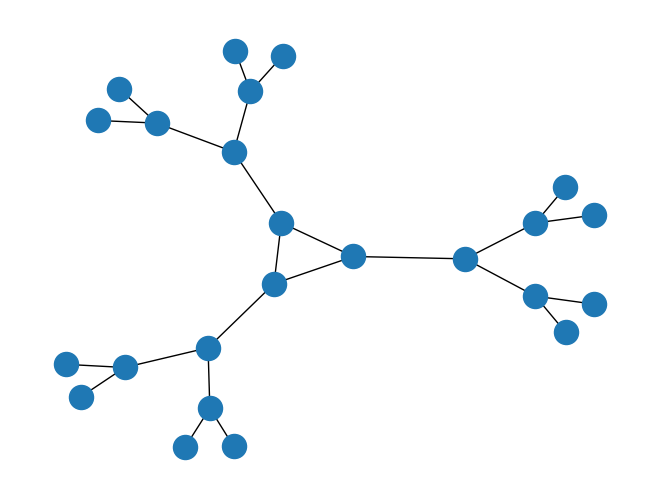

In [64]:
# Load the edges from the file

def create_graph(n, b, d):
    """
    creates a n-cycle graph first, and then on each vertex build a d_depth balanced b-nary tree
    """
    G = cycle_graph(n)
    
    for i in range(n):
        H = balanced_tree(b, d)
        j = len(G.edges)
        G = nx.disjoint_union(G, H)
        G.add_edge(i, j)
    
    
    return G

test_graph = create_graph(3, 2, 2)


nx.draw(test_graph)
plt.show()

In [65]:
# Create the graph
G = create_graph(8, 3, 3)

In [66]:
# Get all-pairs shortest path lengths as a dictionary
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [67]:
# Create the distance matrix
num_nodes = len(G.edges)
distance_matrix = np.full((num_nodes, num_nodes), np.inf)

for i in range(num_nodes):
    for j, dist in shortest_path_lengths.get(i, {}).items():
        distance_matrix[i, j] = dist

distance_matrix[np.isinf(distance_matrix)] = -1

### t-SNE visualization

In [68]:
tsne = TSNE(n_components=2, metric="precomputed", init="random", random_state=42)
tsne_embedding = tsne.fit_transform(distance_matrix)

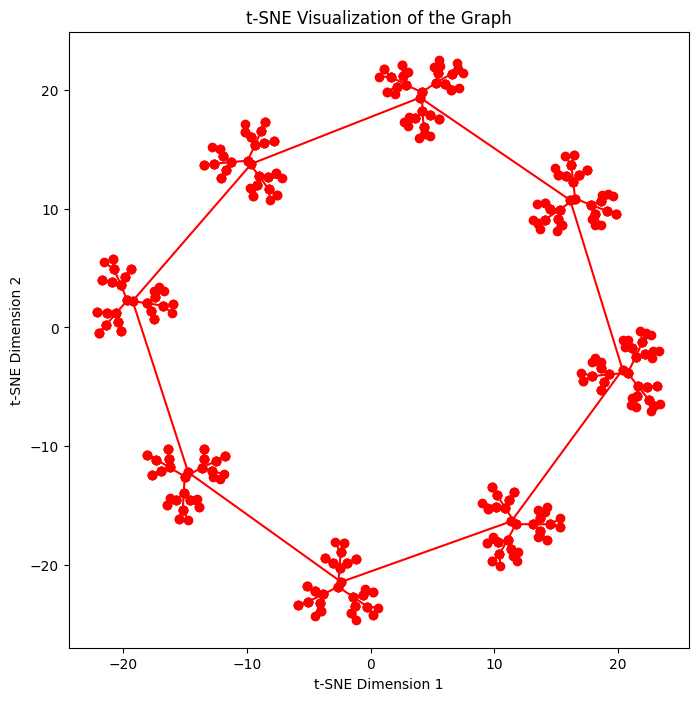

In [69]:
plt.figure(figsize=(8, 8))

for u, v in G.edges:
    x_vals = [tsne_embedding[u, 0], tsne_embedding[v, 0]]
    y_vals = [tsne_embedding[u, 1], tsne_embedding[v, 1]]
    plt.plot(x_vals, y_vals, 'ro-')

plt.title("t-SNE Visualization of the Graph")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.savefig("./saved_figures/" + "tsne_graph_gu.png")
plt.show()

### UMAP visualization

In [70]:
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric="precomputed", random_state=42)
umap_embedding = umap_reducer.fit_transform(distance_matrix)

C:\Users\jiaze\anaconda3\envs\uml_project\lib\site-packages\umap\umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
C:\Users\jiaze\anaconda3\envs\uml_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


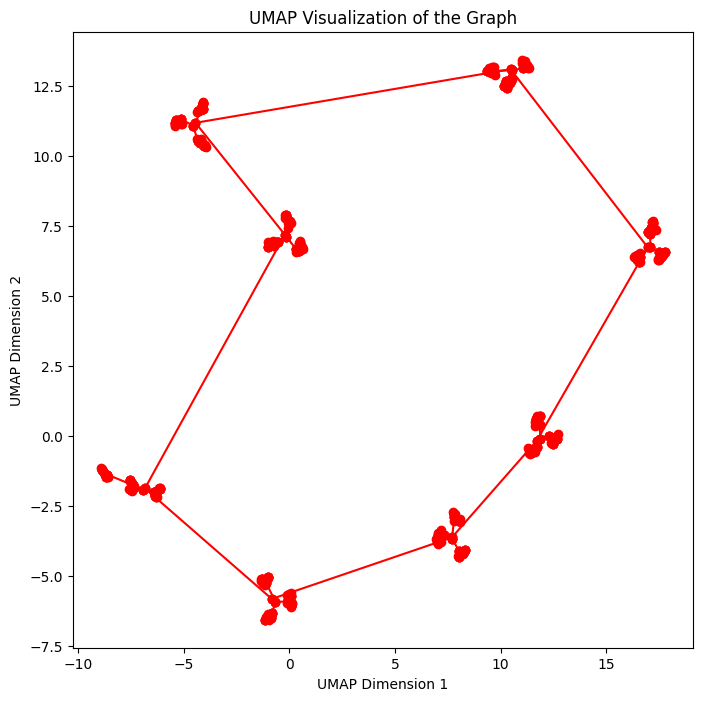

In [71]:
plt.figure(figsize=(8, 8))

for u, v in G.edges:
    x_vals = [umap_embedding[u, 0], umap_embedding[v, 0]]
    y_vals = [umap_embedding[u, 1], umap_embedding[v, 1]]
    plt.plot(x_vals, y_vals, 'ro-')

plt.title("UMAP Visualization of the Graph")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.savefig("./saved_figures/" + "umap_graph_gu.png")
plt.show()

### PCA visualization

In [72]:
similarity_matrix = np.exp(-distance_matrix / np.mean(distance_matrix[distance_matrix != -1]))
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(similarity_matrix)

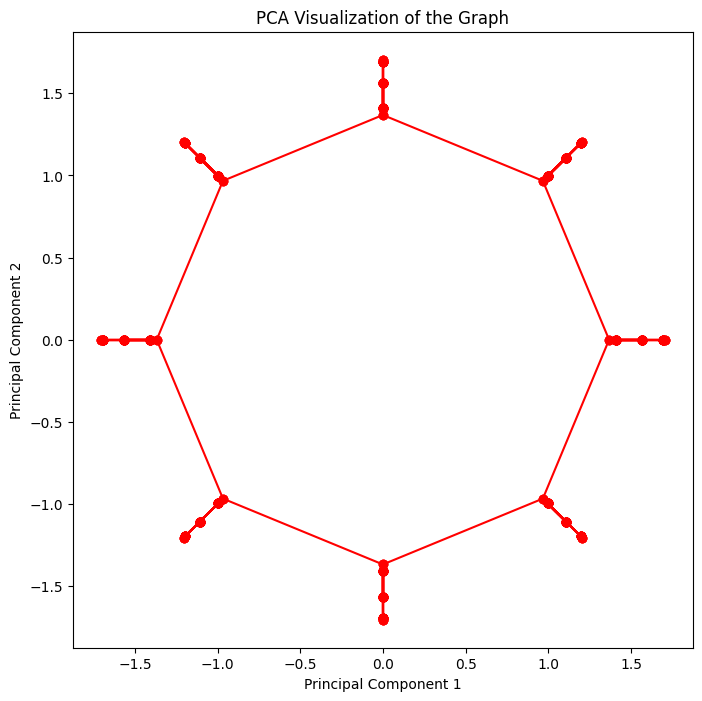

In [73]:
plt.figure(figsize=(8, 8))

for u, v in G.edges:
    x_vals = [pca_embedding[u, 0], pca_embedding[v, 0]]
    y_vals = [pca_embedding[u, 1], pca_embedding[v, 1]]
    plt.plot(x_vals, y_vals, 'ro-')

plt.title("PCA Visualization of the Graph")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("./saved_figures/" + "pca_graph_gu.png")
plt.show()

### MDS visualization

In [74]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_embedding = mds.fit_transform(distance_matrix)

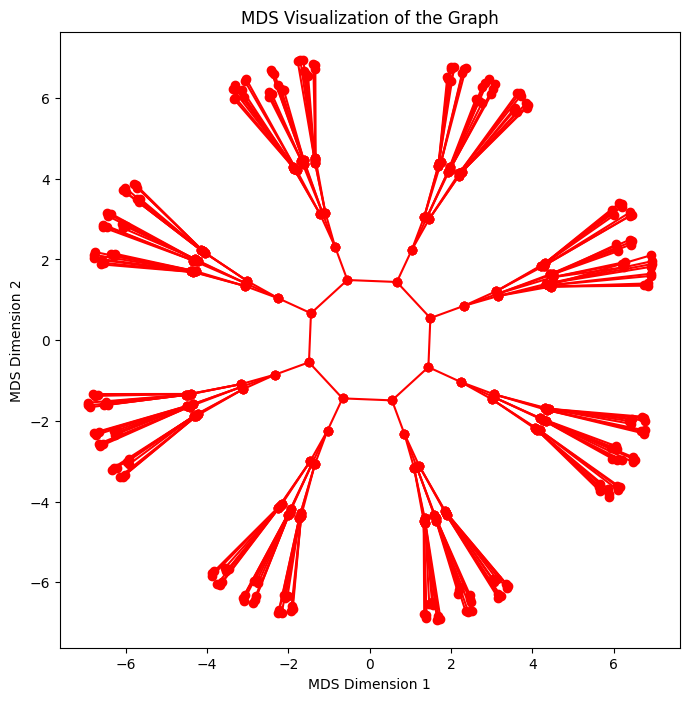

In [75]:
plt.figure(figsize=(8, 8))

for u, v in G.edges:
    x_vals = [mds_embedding[u, 0], mds_embedding[v, 0]]
    y_vals = [mds_embedding[u, 1], mds_embedding[v, 1]]
    plt.plot(x_vals, y_vals, 'ro-')

plt.title("MDS Visualization of the Graph")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.savefig("./saved_figures/" + "mds_graph_gu.png")
plt.show()

### Isomap visualization

In [76]:
isomap = Isomap(n_neighbors=10, n_components=2, metric="precomputed")
isomap_embedding = isomap.fit_transform(distance_matrix)

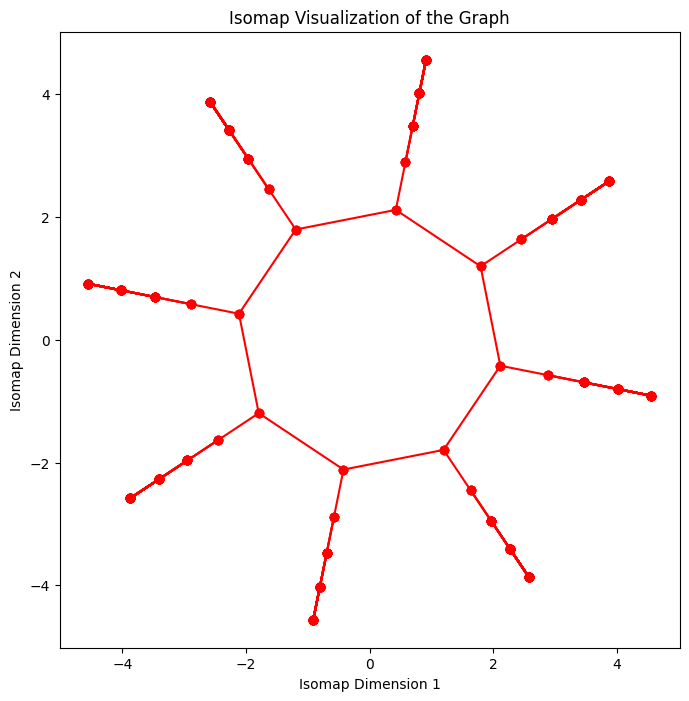

In [77]:
plt.figure(figsize=(8, 8))

for u, v in G.edges:
    x_vals = [isomap_embedding[u, 0], isomap_embedding[v, 0]]
    y_vals = [isomap_embedding[u, 1], isomap_embedding[v, 1]]
    plt.plot(x_vals, y_vals, 'ro-')

plt.title("Isomap Visualization of the Graph")
plt.savefig("./saved_figures/" + "isomap_graph_gu.png")
plt.xlabel("Isomap Dimension 1")
plt.ylabel("Isomap Dimension 2")
plt.show()

### LLE visualization

In [78]:
n_neighbors = 20
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, random_state=42)
lle_embedding = lle.fit_transform(distance_matrix)

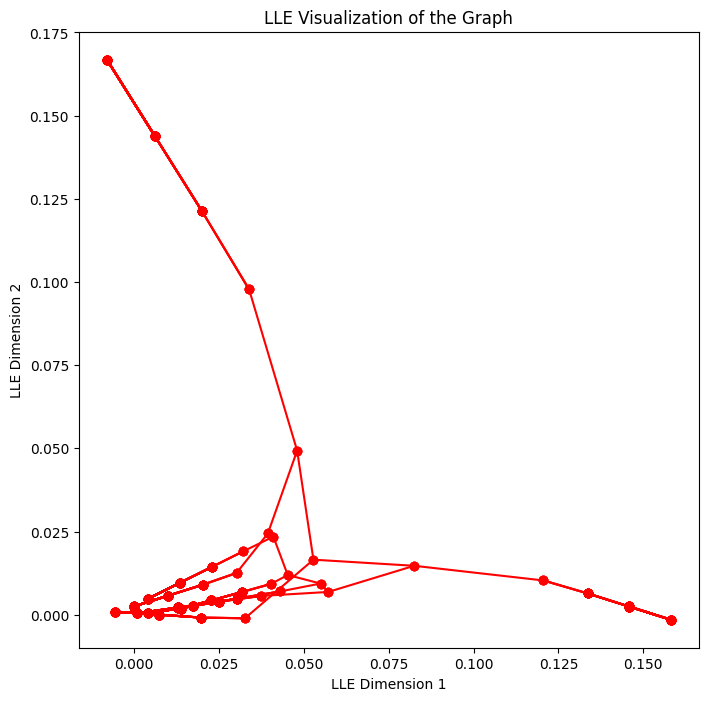

In [79]:
plt.figure(figsize=(8, 8))

for u, v in G.edges:
    x_vals = [lle_embedding[u, 0], lle_embedding[v, 0]]
    y_vals = [lle_embedding[u, 1], lle_embedding[v, 1]]
    plt.plot(x_vals, y_vals, 'ro-')
    
plt.title("LLE Visualization of the Graph")
plt.savefig("./saved_figures/" + "lle_graph_gu.png")
plt.xlabel("LLE Dimension 1")
plt.ylabel("LLE Dimension 2")
plt.show()

### Kernal PCA visualization

In [80]:
gamma = 1.0 / np.mean(distance_matrix[distance_matrix > 0])
similarity_matrix = np.exp(-gamma * distance_matrix)

kpca = KernelPCA(n_components=2, kernel="precomputed")
kpca_embedding = kpca.fit_transform(similarity_matrix)

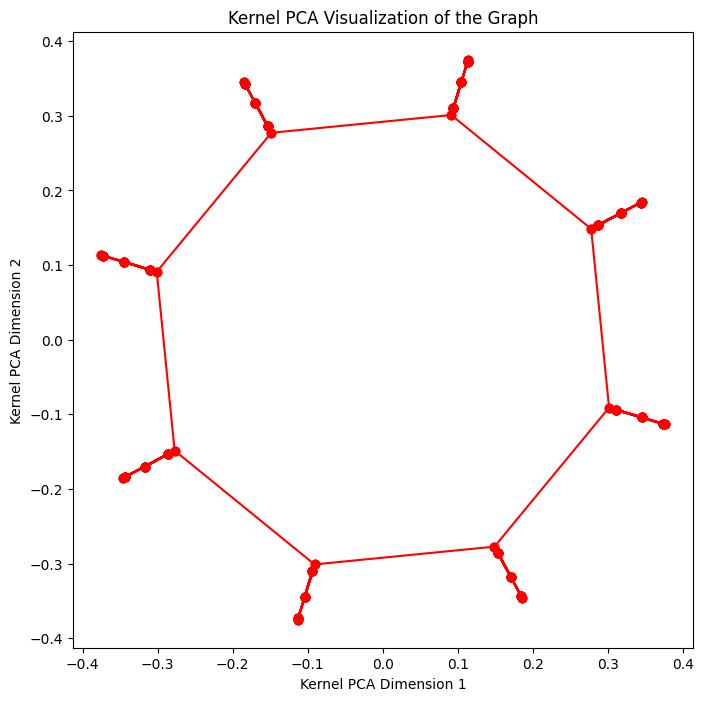

In [81]:
plt.figure(figsize=(8, 8))

for u, v in G.edges:
    x_vals = [kpca_embedding[u, 0], kpca_embedding[v, 0]]
    y_vals = [kpca_embedding[u, 1], kpca_embedding[v, 1]]
    plt.plot(x_vals, y_vals, 'ro-')

plt.title("Kernel PCA Visualization of the Graph")
plt.savefig("./saved_figures/" + "kpca_graph_gu.png")
plt.xlabel("Kernel PCA Dimension 1")
plt.ylabel("Kernel PCA Dimension 2")
plt.show()